In [43]:
import pandas as pd
from scipy.stats import ttest_1samp

In [44]:
# Assuming the files are named 'Winners.csv', 'Losers.csv', and 'Momentum.csv'
# Read the files into dataframes
df_winners = pd.read_csv('Winners.csv')
df_losers = pd.read_csv('Losers.csv')
df_momentum = pd.read_csv('Momentum.csv')

In [45]:
# Convert the 'Date' column to Pandas datetime format, if it's not already
df_winners['Date'] = pd.to_datetime(df_winners['Date'], format='%d/%m/%Y')
df_losers['Date'] = pd.to_datetime(df_losers['Date'], format='%d/%m/%Y')
df_momentum['Date'] = pd.to_datetime(df_momentum['Date'], format='%d/%m/%Y')

# Filter the DataFrame for each time period
## Winners
dfw_1996_to_2022 = df_winners[df_winners['Date'].dt.year.between(1996, 2022)]
dfw_2000_to_2022 = df_winners[df_winners['Date'].dt.year.between(2000, 2022)]
dfw_2010_to_2022 = df_winners[df_winners['Date'].dt.year.between(2010, 2022)]

## Losers
dfl_1996_to_2022 = df_losers[df_losers['Date'].dt.year.between(1996, 2022)]
dfl_2000_to_2022 = df_losers[df_losers['Date'].dt.year.between(2000, 2022)]
dfl_2010_to_2022 = df_losers[df_losers['Date'].dt.year.between(2010, 2022)]

## Momentum
dfm_1996_to_2022 = df_momentum[df_momentum['Date'].dt.year.between(1996, 2022)]
dfm_2000_to_2022 = df_momentum[df_momentum['Date'].dt.year.between(2000, 2022)]
dfm_2010_to_2022 = df_momentum[df_momentum['Date'].dt.year.between(2010, 2022)]

### Period that run ML model
# GFC Period
dfw_2008_to_2010 = df_winners[df_winners['Date'].dt.year.between(2008, 2010)]
dfl_2008_to_2010 = df_losers[df_losers['Date'].dt.year.between(2008, 2010)]
dfm_2008_to_2010 = df_momentum[df_momentum['Date'].dt.year.between(2008, 2010)]

# Pre and Post Covid19 Pandemic
dfw_2016_to_2021 = df_winners[df_winners['Date'].dt.year.between(2016, 2021)]
dfl_2016_to_2021 = df_losers[df_losers['Date'].dt.year.between(2016, 2021)]
dfm_2016_to_2021 = df_momentum[df_momentum['Date'].dt.year.between(2016, 2021)]


In [46]:
# Create an empty DataFrame to store the final results
final_df = pd.DataFrame(index=['Mean', 'Standard Deviation', 'T-test', 'P-Value'])

In [47]:
# Define function to calculate metrics for each strategy
def calculate_metrics(df, risk_free_col='Average Risk-free rate return (converted to monthly)'):
    metrics = {}
    for col in df.columns:
        if col != 'Date' and col != risk_free_col:
            mean_val = df[col].mean()
            std_dev = df[col].std()

            # Calculate Sharpe Ratio
            sharpe_ratio = (mean_val - df[risk_free_col].mean()) / std_dev

            # Perform one-sample t-test against 'Average Risk-free rate return (converted to monthly)'
            # Use dropna() to exclude NaN values
            t_stat, p_val = ttest_1samp(df[col].dropna(), df[risk_free_col].dropna().mean())

            metrics[col] = {'Mean': mean_val, 'Standard Deviation': std_dev, 'T-test': t_stat, 'P-Value': p_val, 'Sharpe Ratio': sharpe_ratio}
    return pd.DataFrame(metrics)

In [48]:
# Create a dictionary to hold the final DataFrames for each strategy and time period
final_dfs = {}

# List of strategies and their corresponding DataFrames
strategies = {
    'Winners': [dfw_1996_to_2022, dfw_2000_to_2022, dfw_2010_to_2022, dfw_2008_to_2010, dfw_2016_to_2021],
    'Losers': [dfl_1996_to_2022, dfl_2000_to_2022, dfl_2010_to_2022, dfl_2008_to_2010, dfl_2016_to_2021],
    'Momentum': [dfm_1996_to_2022, dfm_2000_to_2022, dfm_2010_to_2022, dfm_2008_to_2010, dfm_2016_to_2021]
}

# List of time periods
time_periods = ['1996_to_2022', '2000_to_2022', '2010_to_2022', '2008_to_2010', '2016_to_2021']

In [49]:
# Loop through each strategy and time period to calculate metrics
for strategy, dfs in strategies.items():
    for i, df in enumerate(dfs):
        time_period = time_periods[i]
        key = f"{strategy}_{time_period}"
        final_dfs[key] = calculate_metrics(df)

# Overall Dataset

In [50]:
final_dfs['Winners_1996_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.003533,0.003771,0.003390,0.002466,0.002394,0.002334,0.000949,0.001172,0.000876
Standard Deviation,0.088383,0.087569,0.088219,0.086148,0.085301,0.085835,0.083169,0.082655,0.082962
T-test,0.092718,0.142505,0.063877,-0.126857,-0.143190,-0.154673,-0.453287,-0.408312,-0.470065
P-Value,0.926185,0.886770,0.949108,0.899134,0.886231,0.877177,0.650656,0.683324,0.638636
Sharpe Ratio,0.005159,0.007929,0.003554,-0.007092,-0.008005,-0.008646,-0.025580,-0.023042,-0.026527


In [51]:
final_dfs['Losers_1996_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,-0.000194,-0.000802,0.000204,-0.002890,-0.001988,-0.002834,-0.002236,-0.001552,-0.002201
Standard Deviation,0.079536,0.105597,0.081686,0.116319,0.115101,0.116291,0.122522,0.120244,0.122290
T-test,-0.744349,-0.664080,-0.637224,-0.921190,-0.790731,-0.912763,-0.771728,-0.685495,-0.768163
P-Value,0.457208,0.507114,0.524432,0.357647,0.429688,0.362056,0.440858,0.493539,0.442969
Sharpe Ratio,-0.041417,-0.036950,-0.035456,-0.051496,-0.044203,-0.051025,-0.043551,-0.038685,-0.043350


In [52]:
final_dfs['Momentum_1996_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.003721,0.004576,0.003178,0.005339,0.004363,0.005151,0.003196,0.002710,0.003101
Standard Deviation,0.052927,0.049059,0.053937,0.065553,0.063408,0.065478,0.071074,0.067471,0.070858
T-test,0.218863,0.549441,0.033895,0.617263,0.362816,0.566694,0.029696,-0.096292,0.006066
P-Value,0.826896,0.583084,0.972982,0.537501,0.716983,0.571321,0.976328,0.923350,0.995164
Sharpe Ratio,0.012178,0.030572,0.001886,0.034506,0.020282,0.031679,0.001676,-0.005434,0.000342


# 2000 to 2022

In [53]:
final_dfs['Winners_2000_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.004873,0.004801,0.004707,0.004710,0.004514,0.004558,0.003583,0.003616,0.003500
Standard Deviation,0.067998,0.065746,0.067752,0.064647,0.062466,0.064167,0.062364,0.060699,0.062052
T-test,0.438957,0.435680,0.399680,0.419811,0.382430,0.383549,0.135005,0.147632,0.113372
P-Value,0.661037,0.663411,0.689702,0.674951,0.702438,0.701609,0.892707,0.882741,0.909818
Sharpe Ratio,0.026422,0.026225,0.024058,0.025270,0.023020,0.023087,0.008126,0.008886,0.006824


In [54]:
final_dfs['Losers_2000_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,-0.001822,-0.001815,-0.001357,-0.004133,-0.003184,-0.004068,-0.004043,-0.003238,-0.004004
Standard Deviation,0.064143,0.073606,0.067244,0.079621,0.078038,0.079574,0.084032,0.081612,0.083647
T-test,-1.274843,-1.109391,-1.101024,-1.509259,-1.337866,-1.496540,-1.412207,-1.290273,-1.410865
P-Value,0.203441,0.268231,0.271849,0.132381,0.182045,0.135660,0.159020,0.198040,0.159415
Sharpe Ratio,-0.076737,-0.066777,-0.066274,-0.090847,-0.080530,-0.090081,-0.085005,-0.077665,-0.084924


In [55]:
final_dfs['Momentum_2000_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.006686,0.006617,0.006051,0.008823,0.007664,0.008606,0.007641,0.006840,0.007533
Standard Deviation,0.028571,0.036125,0.030763,0.042862,0.041047,0.042746,0.052255,0.049608,0.051929
T-test,2.098698,1.628405,1.606041,2.227476,1.856677,2.148954,1.451010,1.260404,1.425599
P-Value,0.036755,0.104584,0.109413,0.026725,0.064426,0.032511,0.147917,0.208592,0.155118
Sharpe Ratio,0.126327,0.098018,0.096672,0.134078,0.111759,0.129352,0.087341,0.075867,0.085811


# 2010 to 2022

In [56]:
final_dfs['Winners_2010_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.006795,0.005904,0.006545,0.006244,0.005346,0.005910,0.007417,0.006718,0.007135
Standard Deviation,0.059425,0.056701,0.058905,0.059532,0.056925,0.058672,0.060873,0.059367,0.060366
T-test,0.781521,0.622788,0.735407,0.664454,0.497979,0.603231,0.890515,0.766102,0.839628
P-Value,0.435688,0.534339,0.463203,0.507387,0.619204,0.547236,0.374570,0.444781,0.402410
Sharpe Ratio,0.062572,0.049863,0.058880,0.053199,0.039870,0.048297,0.071298,0.061337,0.067224


In [57]:
final_dfs['Losers_2010_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,-0.000671,-0.000158,0.000193,-0.002146,-0.000913,-0.002033,-0.003460,-0.002633,-0.003453
Standard Deviation,0.055163,0.065800,0.060914,0.069934,0.068463,0.069766,0.072383,0.070467,0.071711
T-test,-0.853858,-0.618368,-0.596070,-0.936945,-0.732079,-0.919007,-1.132004,-1.016095,-1.141271
P-Value,0.394501,0.537240,0.551998,0.350244,0.465226,0.359520,0.259381,0.311167,0.255517
Sharpe Ratio,-0.068363,-0.049509,-0.047724,-0.075016,-0.058613,-0.073579,-0.090633,-0.081353,-0.091375


In [58]:
final_dfs['Momentum_2010_to_2022']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.007457,0.006085,0.006347,0.008369,0.006217,0.007918,0.010892,0.009341,0.010627
Standard Deviation,0.027687,0.034187,0.031108,0.038577,0.036781,0.038424,0.043688,0.041432,0.043250
T-test,1.975872,1.099214,1.312911,1.713652,1.066532,1.573849,2.234343,1.888633,2.180420
P-Value,0.049945,0.273379,0.191153,0.088592,0.287841,0.117561,0.026891,0.060809,0.030734
Sharpe Ratio,0.158196,0.088008,0.105117,0.137202,0.085391,0.126009,0.178891,0.151212,0.174573


# GFC

In [59]:
final_dfs['Winners_2008_to_2010']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.005250,0.005222,0.005056,0.000278,0.001139,0.000556,-0.005389,-0.004389,-0.004806
Standard Deviation,0.059289,0.059393,0.059414,0.055047,0.053423,0.054788,0.050092,0.049132,0.049964
T-test,0.219953,0.216760,0.199854,-0.305060,-0.217621,-0.276083,-1.013985,-0.911678,-0.946536
P-Value,0.827186,0.829654,0.842752,0.762127,0.828989,0.784108,0.317549,0.368175,0.350365
Sharpe Ratio,0.036659,0.036127,0.033309,-0.050843,-0.036270,-0.046014,-0.168997,-0.151946,-0.157756


In [60]:
final_dfs['Losers_2008_to_2010']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,-0.003892,-0.005228,-0.004067,-0.004450,-0.003292,-0.004439,0.001667,0.003033,0.001936
Standard Deviation,0.069805,0.077127,0.071461,0.084695,0.084024,0.084948,0.096065,0.093246,0.095638
T-test,-0.600958,-0.647853,-0.601723,-0.534859,-0.456419,-0.532480,-0.089523,-0.004290,-0.073018
P-Value,0.551741,0.521307,0.551237,0.596130,0.650908,0.597758,0.929177,0.996602,0.942207
Sharpe Ratio,-0.100160,-0.107976,-0.100287,-0.089143,-0.076070,-0.088747,-0.014920,-0.000715,-0.012170


In [61]:
final_dfs['Momentum_2008_to_2010']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.009107,0.010460,0.009047,0.004695,0.004410,0.004981,-0.007040,-0.007466,-0.006719
Standard Deviation,0.025205,0.033203,0.027793,0.046605,0.044977,0.046322,0.072126,0.068144,0.071561
T-test,1.435522,1.334164,1.288840,0.208352,0.177825,0.246655,-0.841602,-0.928289,-0.821317
P-Value,0.160016,0.190767,0.205908,0.836162,0.859886,0.806617,0.405725,0.359615,0.417025
Sharpe Ratio,0.239254,0.222361,0.214807,0.034725,0.029637,0.041109,-0.140267,-0.154715,-0.136886


# Covid-19 Pre and Post

In [62]:
final_dfs['Winners_2016_to_2021']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.005583,0.004431,0.005042,0.003833,0.002042,0.003111,0.005014,0.003917,0.004403
Standard Deviation,0.070274,0.065747,0.069301,0.069881,0.065828,0.068247,0.069668,0.067214,0.068677
T-test,0.302686,0.174749,0.240612,0.091894,-0.133397,0.004298,0.235960,0.106060,0.163862
P-Value,0.763015,0.861774,0.810550,0.927041,0.894257,0.996583,0.814143,0.915834,0.870305
Sharpe Ratio,0.035672,0.020594,0.028356,0.010830,-0.015721,0.000507,0.027808,0.012499,0.019311


In [63]:
final_dfs['Losers_2016_to_2021']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,-0.001646,0.001560,0.000226,-0.001365,-0.000833,-0.001121,-0.002736,-0.003035,-0.002719
Standard Deviation,0.063599,0.077776,0.074188,0.081666,0.079887,0.081348,0.087064,0.084727,0.085841
T-test,-0.633182,-0.168043,-0.328669,-0.463955,-0.417783,-0.440268,-0.568790,-0.614384,-0.575244
P-Value,0.528649,0.867027,0.743373,0.644099,0.677366,0.661081,0.571293,0.540925,0.566945
Sharpe Ratio,-0.074621,-0.019804,-0.038734,-0.054678,-0.049236,-0.051886,-0.067033,-0.072406,-0.067793


In [64]:
final_dfs['Momentum_2016_to_2021']

,3M Normal,3M Enhanced,3M ML,6M Normal,6M Enhanced,6M ML,12M Normal,12M Enhanced,12M ML
Mean,0.007193,0.002859,0.004788,0.005195,0.002845,0.004218,0.007742,0.006990,0.007168
Standard Deviation,0.035371,0.041608,0.041059,0.045590,0.041917,0.045233,0.055774,0.052563,0.054989
T-test,0.987532,-0.044326,0.353721,0.394242,-0.046942,0.214045,0.709838,0.631703,0.631352
P-Value,0.326735,0.964769,0.724596,0.694584,0.962691,0.831125,0.480129,0.529610,0.529838
Sharpe Ratio,0.116382,-0.005224,0.041686,0.046462,-0.005532,0.025225,0.083655,0.074447,0.074406


In [69]:
# Convert the DataFrames to LaTeX tables
Winners_1996_to_2022 = final_dfs['Winners_1996_to_2022'].to_latex(index=True)
Winners_2000_to_2022 = final_dfs['Winners_2000_to_2022'].to_latex(index=True)
Winners_2010_to_2022 = final_dfs['Winners_2010_to_2022'].to_latex(index=True)
Winners_2008_to_2010 = final_dfs['Winners_2008_to_2010'].to_latex(index=True)
Winners_2016_to_2021 = final_dfs['Winners_2016_to_2021'].to_latex(index=True)

Losers_1996_to_2022 = final_dfs['Losers_1996_to_2022'].to_latex(index=True)
Losers_2000_to_2022 = final_dfs['Losers_2000_to_2022'].to_latex(index=True)
Losers_2010_to_2022 = final_dfs['Losers_2010_to_2022'].to_latex(index=True)
Losers_2008_to_2010 = final_dfs['Losers_2008_to_2010'].to_latex(index=True)
Losers_2016_to_2021 = final_dfs['Losers_2016_to_2021'].to_latex(index=True)

Momentum_1996_to_2022 = final_dfs['Momentum_1996_to_2022'].to_latex(index=True)
Momentum_2000_to_2022 = final_dfs['Momentum_2000_to_2022'].to_latex(index=True)
Momentum_2010_to_2022 = final_dfs['Momentum_2010_to_2022'].to_latex(index=True)
Momentum_2008_to_2010 = final_dfs['Momentum_2008_to_2010'].to_latex(index=True)
Momentum_2016_to_2021 = final_dfs['Momentum_2016_to_2021'].to_latex(index=True)


C:\Users\akmal\AppData\Local\Temp\ipykernel_16204\22652519.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  Winners_1996_to_2022 = final_dfs['Winners_1996_to_2022'].to_latex(index=True)
C:\Users\akmal\AppData\Local\Temp\ipykernel_16204\22652519.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  Winners_2000_to_2022 = final_dfs['Winners_2000_to_2022'].to_latex(index=True)
C:\Users\akmal\AppData\Local\Temp\ipykernel_16204\22652519.py:4: FutureWarning: In future versions `

In [70]:
# Print each LaTeX table
print(f"LaTeX Table for Winners from 1996 to 2022:\n{Winners_1996_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Winners from 2000 to 2022:\n{Winners_2000_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Winners from 2010 to 2022:\n{Winners_2010_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Winners from 2008 to 2010:\n{Winners_2008_to_2010}\n{'='*50}\n")
print(f"LaTeX Table for Winners from 2016 to 2021:\n{Winners_2016_to_2021}\n{'='*50}\n")

print(f"LaTeX Table for Losers from 1996 to 2022:\n{Losers_1996_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Losers from 2000 to 2022:\n{Losers_2000_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Losers from 2010 to 2022:\n{Losers_2010_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Losers from 2008 to 2010:\n{Losers_2008_to_2010}\n{'='*50}\n")
print(f"LaTeX Table for Losers from 2016 to 2021:\n{Losers_2016_to_2021}\n{'='*50}\n")

print(f"LaTeX Table for Momentum from 1996 to 2022:\n{Momentum_1996_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Momentum from 2000 to 2022:\n{Momentum_2000_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Momentum from 2010 to 2022:\n{Momentum_2010_to_2022}\n{'='*50}\n")
print(f"LaTeX Table for Momentum from 2008 to 2010:\n{Momentum_2008_to_2010}\n{'='*50}\n")
print(f"LaTeX Table for Momentum from 2016 to 2021:\n{Momentum_2016_to_2021}\n{'='*50}\n")


LaTeX Table for Winners from 1996 to 2022:
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  3M Normal &  3M Enhanced &     3M ML &  6M Normal &  6M Enhanced &     6M ML &  12M Normal &  12M Enhanced &    12M ML \\
\midrule
Mean               &   0.003533 &     0.003771 &  0.003390 &   0.002466 &     0.002394 &  0.002334 &    0.000949 &      0.001172 &  0.000876 \\
Standard Deviation &   0.088383 &     0.087569 &  0.088219 &   0.086148 &     0.085301 &  0.085835 &    0.083169 &      0.082655 &  0.082962 \\
T-test             &   0.092718 &     0.142505 &  0.063877 &  -0.126857 &    -0.143190 & -0.154673 &   -0.453287 &     -0.408312 & -0.470065 \\
P-Value            &   0.926185 &     0.886770 &  0.949108 &   0.899134 &     0.886231 &  0.877177 &    0.650656 &      0.683324 &  0.638636 \\
Sharpe Ratio       &   0.005159 &     0.007929 &  0.003554 &  -0.007092 &    -0.008005 & -0.008646 &   -0.025580 &     -0.023042 & -0.026527 \\
\bottomrule
\end{tabular}


LaTeX Table for Winners from 2000 t

In [68]:
final_dfs['Winners_2000_to_2022'].to_excel('Winners_2000_to_2022.xlsx', index=True)
final_dfs['Winners_2010_to_2022'].to_excel('Winners_2010_to_2022.xlsx', index=True)
final_dfs['Winners_2008_to_2010'].to_excel('Winners_2008_to_2010.xlsx', index=True)
final_dfs['Winners_2016_to_2021'].to_excel('Winners_2016_to_2021.xlsx', index=True)

final_dfs['Losers_1996_to_2022'].to_excel('Losers_1996_to_2022.xlsx', index=True)
final_dfs['Losers_2000_to_2022'].to_excel('Losers_2000_to_2022.xlsx', index=True)
final_dfs['Losers_2010_to_2022'].to_excel('Losers_2010_to_2022.xlsx', index=True)
final_dfs['Losers_2008_to_2010'].to_excel('Losers_2008_to_2010.xlsx', index=True)
final_dfs['Losers_2016_to_2021'].to_excel('Losers_2016_to_2021.xlsx', index=True)

final_dfs['Momentum_1996_to_2022'].to_excel('Momentum_1996_to_2022.xlsx', index=True)
final_dfs['Momentum_2000_to_2022'].to_excel('Momentum_2000_to_2022.xlsx', index=True)
final_dfs['Momentum_2010_to_2022'].to_excel('Momentum_2010_to_2022.xlsx', index=True)
final_dfs['Momentum_2008_to_2010'].to_excel('Momentum_2008_to_2010.xlsx', index=True)
final_dfs['Momentum_2016_to_2021'].to_excel('Momentum_2016_to_2021.xlsx', index=True)

## Charts and Plots

In [25]:
import matplotlib.pyplot as plt

# Replace 'your_file_path.csv' with the actual path to your CSV file
csv_file_path = 'KLCI.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Print the DataFrame to verify the changes
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Earnings
0,1994-12-30,967.80,977.68,967.80,971.21,971.21,NaN,NaN
1,1995-01-03,970.84,977.64,968.87,969.70,969.70,NaN,NaN
2,1995-01-04,969.51,969.51,956.13,957.81,957.81,NaN,NaN
3,1995-01-05,958.52,965.89,958.52,965.89,965.89,NaN,NaN
4,1995-01-06,966.37,966.51,955.43,955.43,955.43,15981000.0,NaN


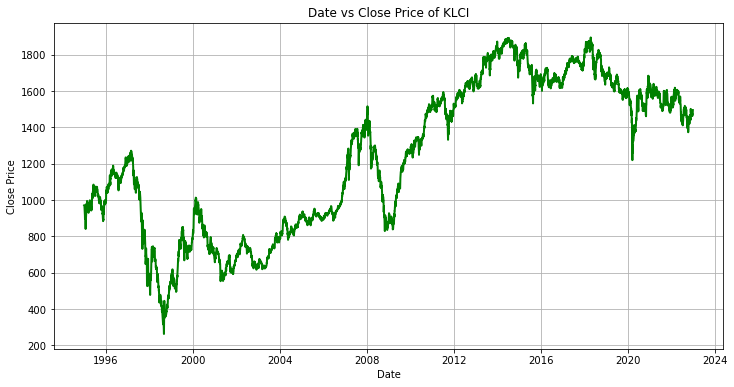

In [27]:
# Plotting the 'Date' against 'Close'
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], marker='', linestyle='-', linewidth=2, color='green')

# Adding title and labels
plt.title('Date vs Close Price of KLCI')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Adding grid for easier readability
plt.grid(True)

plt.show()


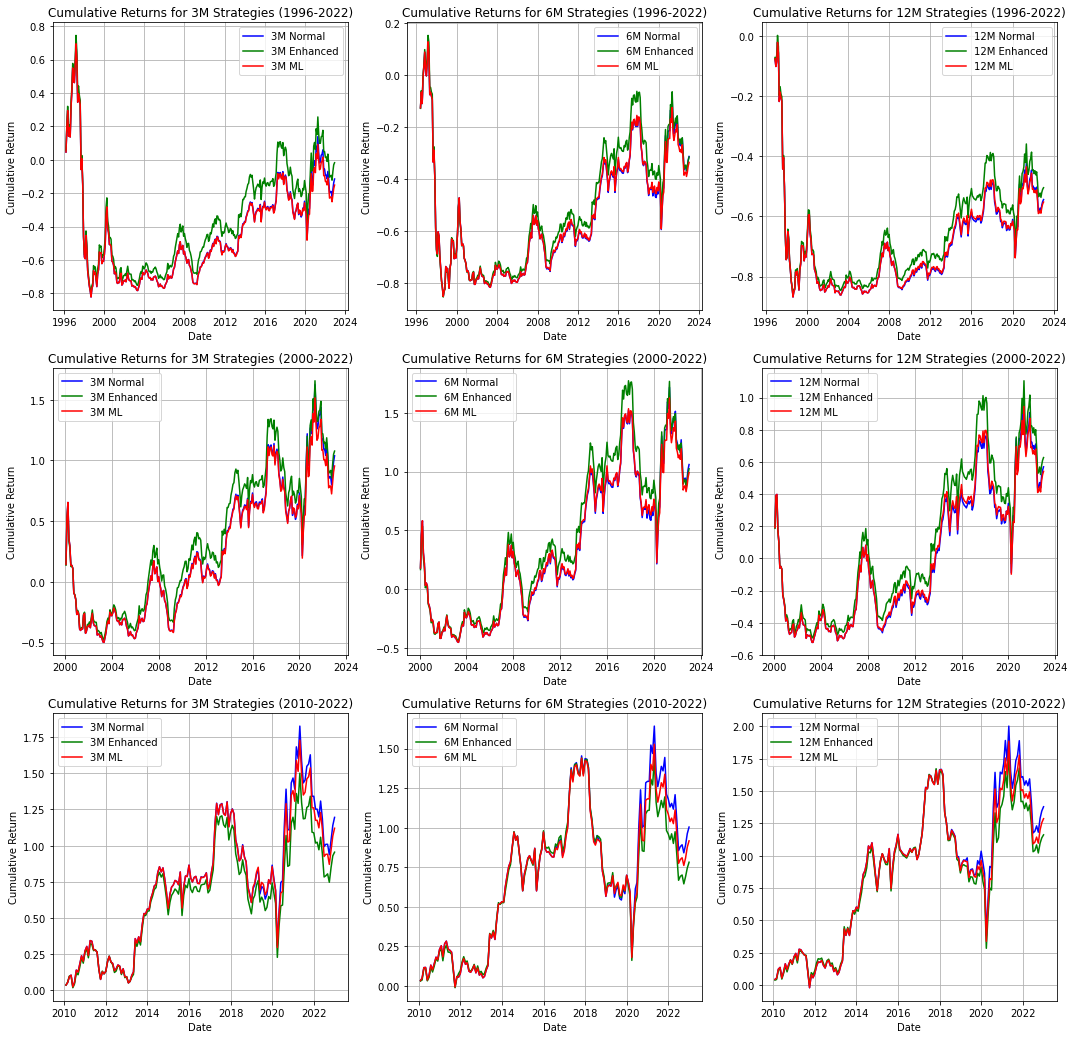

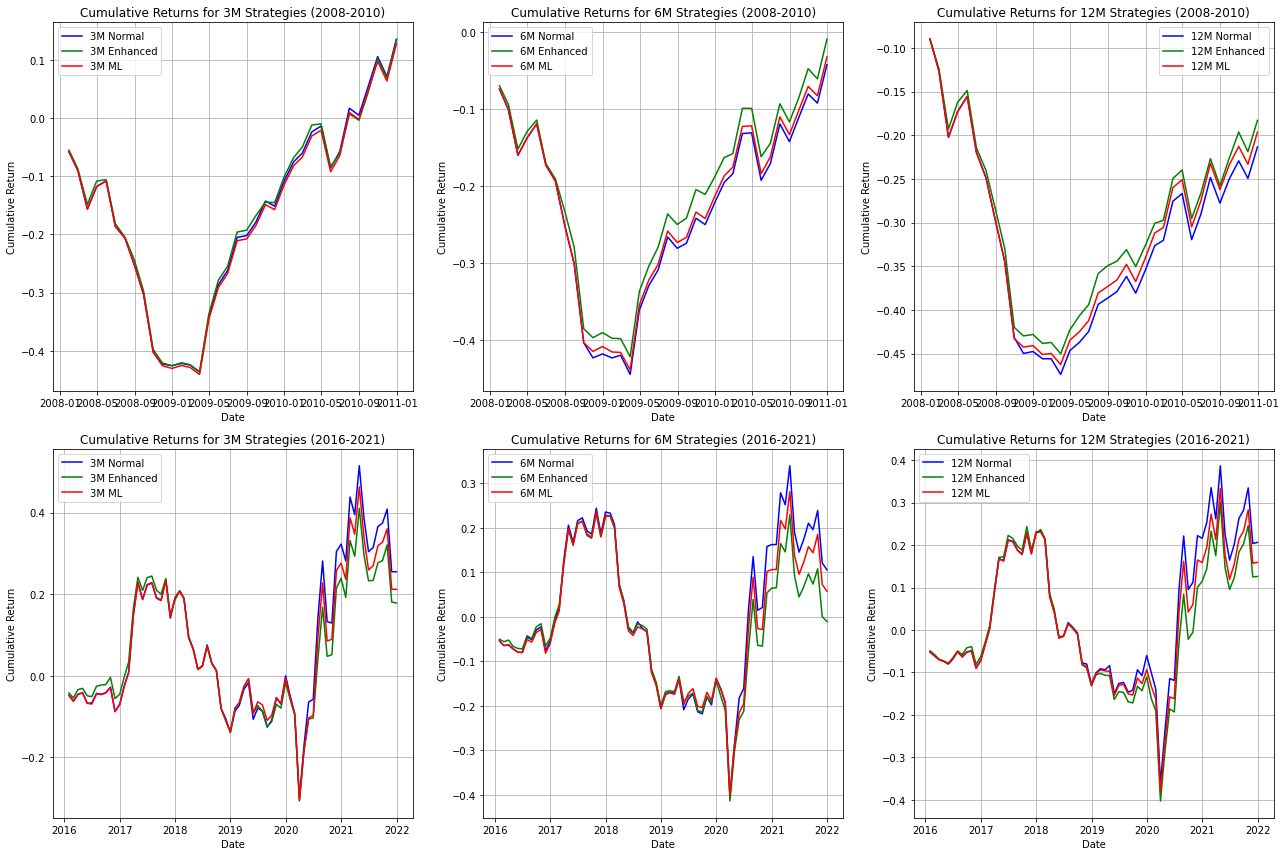

In [30]:
# Initialize two separate figures
# First figure for 1996-2022, 2000-2022, and 2010-2022
fig1, axes1 = plt.subplots(3, 3, figsize=(18, 18))

# Second figure for 2008-2010 and 2016-2021
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 12))

# Define the time periods for each figure
df_list1 = [dfw_1996_to_2022, dfw_2000_to_2022, dfw_2010_to_2022]
labels1 = ['1996-2022', '2000-2022', '2010-2022']

df_list2 = [dfw_2008_to_2010, dfw_2016_to_2021]
labels2 = ['2008-2010', '2016-2021']

# Function to plot cumulative returns
def plot_cumulative_returns(ax, df, label):
    cum_return_3M = (1 + df[['3M Normal', '3M Enhanced', '3M ML']]).cumprod() - 1
    cum_return_6M = (1 + df[['6M Normal', '6M Enhanced', '6M ML']]).cumprod() - 1
    cum_return_12M = (1 + df[['12M Normal', '12M Enhanced', '12M ML']]).cumprod() - 1
    
    ax[0].plot(df['Date'], cum_return_3M['3M Normal'], label='3M Normal', color='blue')
    ax[0].plot(df['Date'], cum_return_3M['3M Enhanced'], label='3M Enhanced', color='green')
    ax[0].plot(df['Date'], cum_return_3M['3M ML'], label='3M ML', color='red')
    ax[0].set_title(f'Cumulative Returns for 3M Strategies ({label})')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Cumulative Return')
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(df['Date'], cum_return_6M['6M Normal'], label='6M Normal', color='blue')
    ax[1].plot(df['Date'], cum_return_6M['6M Enhanced'], label='6M Enhanced', color='green')
    ax[1].plot(df['Date'], cum_return_6M['6M ML'], label='6M ML', color='red')
    ax[1].set_title(f'Cumulative Returns for 6M Strategies ({label})')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Cumulative Return')
    ax[1].legend()
    ax[1].grid(True)

    ax[2].plot(df['Date'], cum_return_12M['12M Normal'], label='12M Normal', color='blue')
    ax[2].plot(df['Date'], cum_return_12M['12M Enhanced'], label='12M Enhanced', color='green')
    ax[2].plot(df['Date'], cum_return_12M['12M ML'], label='12M ML', color='red')
    ax[2].set_title(f'Cumulative Returns for 12M Strategies ({label})')
    ax[2].set_xlabel('Date')
    ax[2].set_ylabel('Cumulative Return')
    ax[2].legend()
    ax[2].grid(True)
    
    
# Plot for the first figure
for i, (df, label) in enumerate(zip(df_list1, labels1)):
    plot_cumulative_returns(axes1[i, :], df, label)

# Plot for the second figure
for i, (df, label) in enumerate(zip(df_list2, labels2)):
    plot_cumulative_returns(axes2[i, :], df, label)

plt.tight_layout()
plt.show()

